In [2]:
# Import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
# import the iris dataset from seaborn
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris_no_labels = iris.copy().drop('species', axis=1)
iris_no_labels.head()

# our aim would be to recreate the species column using the KMeans algorithm

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# check unique species
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
# split the data into features and target
X = iris.drop('species', axis=1)
y = iris['species']

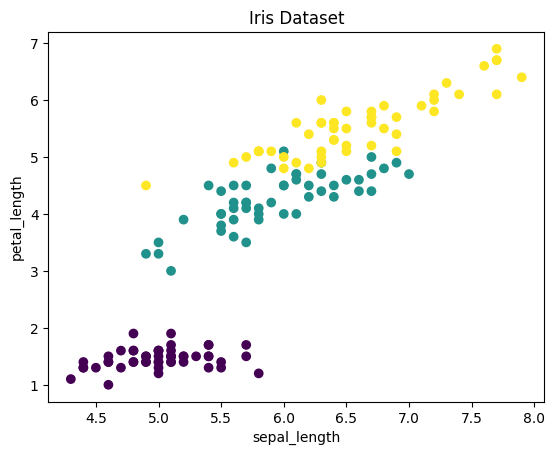

In [7]:
y_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
y_changed = y.map(y_map)

# Plot the dataset
plt.scatter(X['sepal_length'], X['petal_length'], c=y_changed, cmap='viridis')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Iris Dataset')
plt.show()

In [16]:
# Create our KMeans model

# instantiate the model
kmeans = KMeans(n_clusters=3, n_init='auto')

# fit the model
kmeans.fit(iris_no_labels)

# add labels to the dataset
iris['predicted_species'] = kmeans.labels_

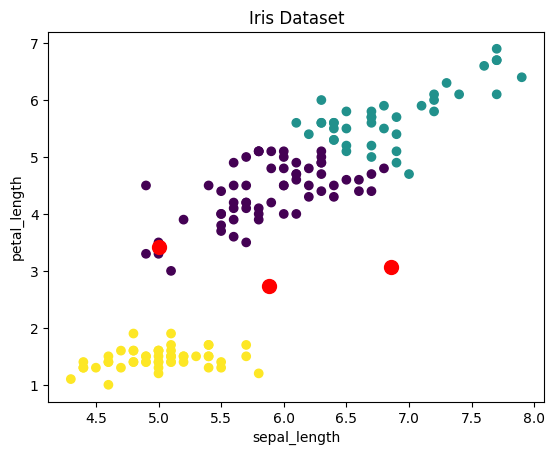

In [18]:
# Plot the dataset
plt.scatter(iris_no_labels['sepal_length'], iris_no_labels['petal_length'], c=iris['predicted_species'], cmap='viridis')
# add the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='o', s=100)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Iris Dataset')
plt.show()

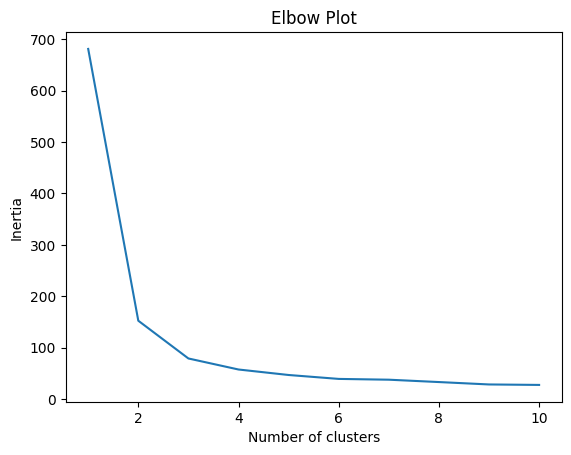

In [19]:
# elbow plot to determine the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(iris_no_labels)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()